### Demonstration of Bayesian Perception Concepts

# Case 3: Elegant integration of object existence estimates from several models

## Example 1: Resolving adversarial attack

Image illusion on the road where prior and models provide mixed judgement. However, as the object is close, the radar and LiDAR-based model provides the judgement of 'no object' with very high certainty, overruling the image-based models.

Assumptions:
- Detected object with hypothesis 'person' on road close to the ego-vehicle
- Deep models based o different sensor modalities
  - LiDAR-based deep model
  - Image-based deep model
  - Radar-based deep model 
- Prior activated by non-road pixels situated on 'road' region

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import beta

np.random.seed(seed=0)

### Measurements

The true existence of the detected object is a binary hidden variable we cannot observe directly.

We assume the measurement device outputs an approximate estimates which **statistically capture the likelihood** of the binary variable being true given the model and corresponding sensor information. The likelihood can be modeled as a **binomial distribution** from which model outcomes are represented as samples from the distribution.

The measurement variance is known and is assumed to be a **learned function** which depends on the model/device and **environmental parameters**:
- Approximate distance rage (i.e. order of 10 or 100 meters?)
- Illumination (i.e. daylight or dusk)
- Approximate size of object (i.e. large truck or pedestrian?)
- etc.

true existence: False
    model_1: 1 (prob_true: 0.95)
    model_2: 0 (prob_true: 0.01)
    model_3: 0 (prob_true: 0.02)


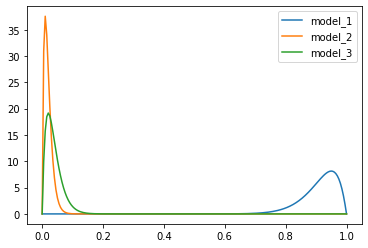

In [2]:
# prob_true : Likelihood of existence (i.e. 1 == 'True' state)

# Image-based model provides high likelihood
model_1_prob_true = 0.95
model_1 = np.random.binomial(1, model_1_prob_true)

model_1_a = 1.0 + 1.0/(1.0 - model_1_prob_true)#model_1_prob_true
model_1_b = 1.0 + 1.0/model_1_prob_true#(1.0 - model_1_prob_true)

# LiDAR-based model provides very low likelihood
model_2_prob_true = 0.01
model_2 = np.random.binomial(1, model_2_prob_true)

model_2_a = 1.0 + 1.0/(1.0 - model_2_prob_true) #model_2_prob_true
model_2_b = 1.0 + 1.0/model_2_prob_true#(1.0 - model_2_prob_true)

# Radar-based model also provide very low likelihood
model_3_prob_true = 0.02
model_3 = np.random.binomial(1, model_3_prob_true)

model_3_a = 1.0 + 1.0/(1.0 - model_3_prob_true) #model_3_prob_true
model_3_b = 1.0 + 1.0/model_3_prob_true#(1.0 - model_3_prob_true)

print(f"true existence: {False}")
print(f"    model_1: {model_1} (prob_true: {model_1_prob_true})")
print(f"    model_2: {model_2} (prob_true: {model_2_prob_true})")
print(f"    model_3: {model_3} (prob_true: {model_3_prob_true})")

beta.plot([model_1_a, model_2_a, model_3_a], [model_1_b, model_2_b, model_3_b], ["model_1", "model_2", "model_3"])

### Prior

The existence prior is dependent on primitive low-level such as non-road pixels projected over 'road' region and/or individual LiDAR and radar points situated on top of 'road' region.

The prior model is trained to favor false positives over false negatives, preferably never missing detecting true objects.

prior: 1 (prob_true: 0.97)


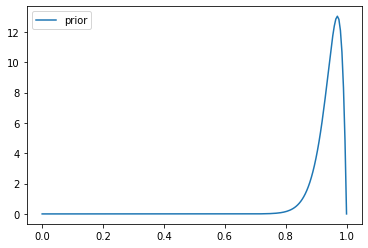

In [3]:
prior_prob_true = 0.97
prior = np.random.binomial(1, prior_prob_true)

prior_a = 1.0 + 1.0/(1.0 - prior_prob_true)
prior_b = 1.0 + 1.0/prior_prob_true

print(f"prior: {prior} (prob_true: {prior_prob_true})")

beta.plot([prior_a], [prior_b], ["prior"])

### Bayesian inference

The true existence is estimated by integrating the prior and noisy measurements using Baye's theorem. This operation leverages the estimated uncertainty to integrate information from both the senses and prior knowledge in a principled manner using the laws of probability.

Biological minds are theorized to do approximate Bayesian inference as well.

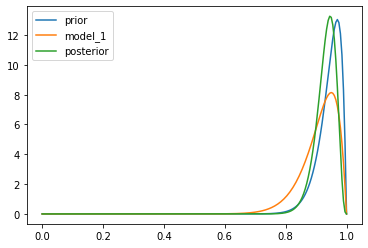

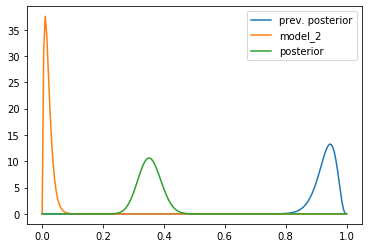

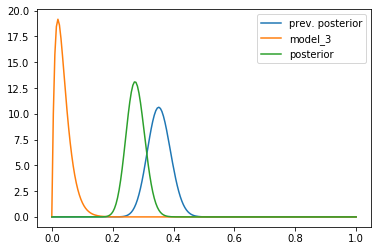

In [4]:
#Integrating model 1
posterior_a = model_1_a + prior_a
posterior_b = model_1_b + prior_b

beta.plot([prior_a, model_1_a, posterior_a], [prior_b, model_1_b, posterior_b], ["prior", "model_1", "posterior"])

prior_a = posterior_a
prior_b = posterior_b

#Integrating model 2
posterior_a = model_2_a + prior_a
posterior_b = model_2_b + prior_b

beta.plot([prior_a, model_2_a, posterior_a], [prior_b, model_2_b, posterior_b], ["prev. posterior", "model_2", "posterior"])

prior_a = posterior_a
prior_b = posterior_b

#Integrating model 2
posterior_a = model_3_a + prior_a
posterior_b = model_3_b + prior_b

beta.plot([prior_a, model_3_a, posterior_a], [prior_b, model_3_b, posterior_b], ["prev. posterior", "model_3", "posterior"])

# Reset prior to original distribution
prior_a = 1.0 + 1.0/(1.0 - prior_prob_true)
prior_b = 1.0 + 1.0/prior_prob_true

In [5]:
posterior_mu = beta.expectation(posterior_a, posterior_b)
posterior_var = beta.variance(posterior_a, posterior_b)
print(f"Posterior mean: {posterior_mu:.2f}")
print(f"Posterior variance: {posterior_var:.6f}")

Posterior mean: 0.28
Posterior variance: 0.000922


### Conclusion

The resulting posterior distribution express a low but notable probability of an object existing based on two groups of models being highly-certain of an object existing and not existing.

An informed decision to be cautious (but not freezing) can be taken. Closing in on the illusion, as well as observing that the image is perfectly still, shall reduce the confidence of the image-based deep model, and completely resolve the adversarial attack.

## Example 2: Estimate 'object existence' of far-away object detection

Detection of objects far away is inherently uncertain, however, it is desirable to at least have a "hunch" of potential objects existing. By leveraging uncertainity it is possible to evaluate object existence based on multiple models based on different sensor modalities, in a principled and modularized way.

Assumptions:
- Detected object hypothesis assumed to exist 120 m from ego-vehicle.
- Deep models based o different sensor modalities
  - LiDAR-based deep model - Does not recognize object at all
  - Image-based deep model - Weak recognition of object
  - Radar-based deep model - Does not recognize object at all
- Prior activated by non-road pixels situated on 'road' region - Strong recognition of object

### Measurements

The true existence of the detected object is a binary hidden variable we cannot observe directly.

We assume the measurement device outputs an approximate estimates which **statistically capture the likelihood** of the binary variable being true given the model and corresponding sensor information. The likelihood can be modeled as a **binomial distribution** from which model outcomes are represented as samples from the distribution.

The measurement variance is known and is assumed to be a **learned function** which depends on the model/device and **environmental parameters**:
- Approximate distance rage (i.e. order of 10 or 100 meters?)
- Illumination (i.e. daylight or dusk)
- Approximate size of object (i.e. large truck or pedestrian?)
- etc.

true existence: False
    model_1: 0 (prob_true: 0.45)
    model_2: 0 (prob_true: 0.12)
    model_3: 0 (prob_true: 0.08)


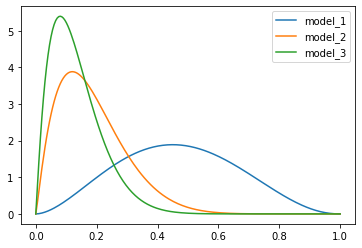

In [6]:
# prob_true : Likelihood of existence (i.e. 1 == 'True' state)

# Image-based model provides high likelihood (considering environmental params.)
model_1_prob_true = 0.45
model_1 = np.random.binomial(1, model_1_prob_true)

model_1_a = 1.0 + 1.0/(1.0 - model_1_prob_true)#model_1_prob_true
model_1_b = 1.0 + 1.0/model_1_prob_true#(1.0 - model_1_prob_true)

# LiDAR-based model provides very likelihood (considering environmental params.)
model_2_prob_true = 0.12
model_2 = np.random.binomial(1, model_2_prob_true)

model_2_a = 1.0 + 1.0/(1.0 - model_2_prob_true) #model_2_prob_true
model_2_b = 1.0 + 1.0/model_2_prob_true#(1.0 - model_2_prob_true)

# Radar-based model also provide low likelihood (considering environmental params.)
model_3_prob_true = 0.08
model_3 = np.random.binomial(1, model_3_prob_true)

model_3_a = 1.0 + 1.0/(1.0 - model_3_prob_true) #model_3_prob_true
model_3_b = 1.0 + 1.0/model_3_prob_true#(1.0 - model_3_prob_true)

print(f"true existence: {False}")
print(f"    model_1: {model_1} (prob_true: {model_1_prob_true})")
print(f"    model_2: {model_2} (prob_true: {model_2_prob_true})")
print(f"    model_3: {model_3} (prob_true: {model_3_prob_true})")

beta.plot([model_1_a, model_2_a, model_3_a], [model_1_b, model_2_b, model_3_b], ["model_1", "model_2", "model_3"])

### Prior

The existence prior is dependent on primitive low-level such as non-road pixels projected over 'road' region and/or individual LiDAR and radar points situated on top of 'road' region.

The prior model is trained to favor false positives over false negatives, preferably never missing detecting true objects.

prior: 1 (prob_true: 0.92)


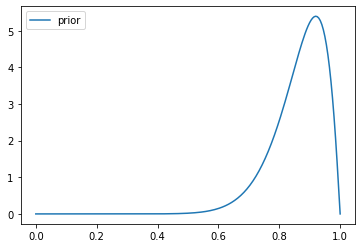

In [7]:
prior_prob_true = 0.92
prior = np.random.binomial(1, prior_prob_true)

prior_a = 1.0 + 1.0/(1.0 - prior_prob_true)
prior_b = 1.0 + 1.0/prior_prob_true

print(f"prior: {prior} (prob_true: {prior_prob_true})")

beta.plot([prior_a], [prior_b], ["prior"])

### Bayesian inference

The true existence is estimated by integrating the prior and noisy measurements using Baye's theorem. This operation leverages the estimated uncertainty to integrate information from both the senses and prior knowledge in a principled manner using the laws of probability.

Biological minds are theorized to do approximate Bayesian inference as well.

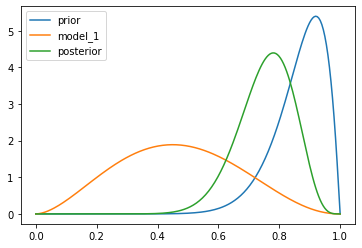

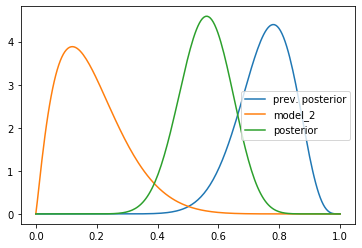

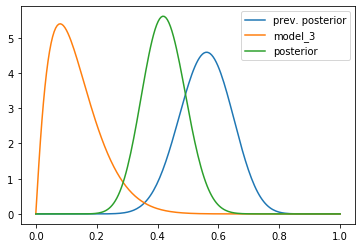

In [8]:
#Integrating model 1
posterior_a = model_1_a + prior_a
posterior_b = model_1_b + prior_b

beta.plot([prior_a, model_1_a, posterior_a], [prior_b, model_1_b, posterior_b], ["prior", "model_1", "posterior"])

prior_a = posterior_a
prior_b = posterior_b

#Integrating model 2
posterior_a = model_2_a + prior_a
posterior_b = model_2_b + prior_b

beta.plot([prior_a, model_2_a, posterior_a], [prior_b, model_2_b, posterior_b], ["prev. posterior", "model_2", "posterior"])

prior_a = posterior_a
prior_b = posterior_b

#Integrating model 2
posterior_a = model_3_a + prior_a
posterior_b = model_3_b + prior_b

beta.plot([prior_a, model_3_a, posterior_a], [prior_b, model_3_b, posterior_b], ["prev. posterior", "model_3", "posterior"])

# Reset prior to original distribution
prior_a = 1.0 + 1.0/(1.0 - prior_prob_true)
prior_b = 1.0 + 1.0/prior_prob_true

In [9]:
posterior_mu = beta.expectation(posterior_a, posterior_b)
posterior_var = beta.variance(posterior_a, posterior_b)
print(f"Posterior mean: {posterior_mu:.2f}")
print(f"Posterior variance: {posterior_var:.6f}")

Posterior mean: 0.42
Posterior variance: 0.004909


### Conclusion

Despite the high-level feature-based models do not identify an object, the confident detection according to low-level feature-based prior model is still influencing the final posterior distribution.

An informed decision to keep or discard the candidate object detection can be made based on the mean likelihood and uncertainty.